# Lab 1: NumPy and Matplotlib

We will explore a series of tools that you will need throughout the class. While you will be able to experiment with this notebook within the <a href="https://mybinder.org/v2/gh/correll/deep-learning/master">interactive version</a> hosted on mybinder.org, it is strongly encouraged that you have installed a local copy of a Python 3 environment, the necessary libraries (NumPy and Matplotlib), as well as a local Jupyter server.

## NumPy

NumPy is a library that facilitates dealing with vectors and matrices. NumPy provides extensions for scientific computing, making programming in Python much more akin to programming in Matlab. Check out <a href="http://cs231n.github.io/python-numpy-tutorial">http://cs231n.github.io/python-numpy-tutorial</a> for a more comprehensive introduction.

### Python lists
Python's built-in equivalent to an array is the list:

In [6]:
x=[1,2,'a string',3]
print(x)
x.append('another string')
print(x)
x.pop()
print(x)
x[1]=5
print(x)

[1, 2, 'a string', 3]
[1, 2, 'a string', 3, 'another string']
[1, 2, 'a string', 3]
[1, 5, 'a string', 3]


Like in Matlab, Python lists can be sliced:

In [11]:
print(x[0:2]) # prints from entry 0 to entry 2 exclusive 
print(x[:2])  # prints from the start to 2 exclusive
print(x[:-1]) # prints from the start to the before-last element
x[1:4]=[2,3,4] # assigns a new sublist
print(x)

[1, 5]
[1, 5]
[1, 5, 'a string']
[1, 2, 3, 4]


### NumPy Arrays

A NumPy array is a multi-dimensional grid of values that are all of the same type. A one-dimensional NumPy array corresponds to a vector, a two-dimensional array corresponds to a matrix. NumPy arrays can be initialized from (nested) Python lists and accessed using the [] notation.

In [27]:
import numpy as np

x = np.array([1,2,3,4]) # [1 2 3 4]
y = np.array([[1,2,3],[4,5,6]]) # [[1 2 3]
                                #  [4 5 6]]
x[0] # 1
y[1][2] #


6

### Some stock NumPy arrays

There are a number of usueful built-in functions to create arrays. Note that the functions below accept only a single parameter, which can be a Python tuple. Specifically zeros(2,2) will not work. Instead, use a tuple (2,2) to indicate that you want to create a 2x2 matrix of zeros.

In [25]:
z=np.zeros((3,3))         # Creates an 3x3 array of zeros
o=np.ones((2,3))          # Creates an 2x3 array of ones
f=np.full((2,2),0.5)      # Creates an 2x2 array filled with 0.5
e=np.eye(4,4)             # Creates a 4x4 identity matrix
r=np.random.random((3,2)) # Creates a 3x2 random matrix
print(r)

[[0.38625879 0.27322499]
 [0.85777433 0.39266281]
 [0.17350074 0.88127004]]


### Slicing NumPy arrays
NumPy arrays can also be sliced. Care needs to be taken as slicing actually does not copy the array, but refers to the original data:

In [36]:
a=y[:,2:4]  # selects both rows, but only colums 2 to 4 (exclusive)
a[0,0]=7    # will replace the entry '3' in y with 7
y

array([[1, 2, 7],
       [4, 5, 6]])

Mixing integer indexing and slice indexing can be tricky:

In [44]:
a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
row1=a[0:1,:]
print(a[0,:])   # prints [1 2 3 4]
print(a[0:1,:]) # prints [[1 2 3 4]]
prints()

[1 2 3 4]
[[1 2 3 4]]


array([[1, 2, 3, 4]])

In [64]:
a=np.array([[1,2],[3,4],[5,6]])
print( a[[0,1,2],[0,1,0]])      # prints [1 4 5]
print([a[0,0],a[1,1],a[2,0]])   # prints [1, 4, 5]

print(a[[0,1],[1,1]])           # prints [2 4]

[1 4 5]
[1, 4, 5]
[2 4]


### Indexing NumPy arrays using boolean operators
NumPy arrays can also be indexed using boolean operators:

In [77]:
print(a[a>2]) # prints [3, 4, 5, 6]
print(a>2)    # prints [[False False][True True][True True]]

b=np.array([1,2,3,4,5,6,7,8])
print(b[b%2==0]) # prints only even numbers

[3 4 5 6]
[[False False]
 [ True  True]
 [ True  True]]
[2 4 6 8]


### Mathematical operations on NumPy arrays

NumPy arrays can be added and subtracted, or element-wise multiplied or divided. Many of the Python operators are overloaded, allowing to seamlessly move to NumPy arrays. 

NumPy also provides a number of built-in functions such as the dot product, summing over all entries of an array, transpose it. All are available as attributes to a NumPy object or stand-alone methods.

In [94]:
x=np.array([1,2,3])
y=np.array([4,5,6])

x+y  # equivalent to np.add(x,y)
x-y  # equivalent to np.subtract(x,y)
x*y  # equivalent to np.multiply(x,y)
x/y  # equivalent to np.divide(x,y)

np.sqrt(x) # element-wise square-root of x

np.dot(x,y) # dot product of x and y
x.dot(y)    # dot product of x and y
y.dot(x)    # dot product of x and y

x.sum()     # sums up all entries of x
np.sum(x)   # sums up all entries of x

m=np.array([x, y]) # stacks x and y into m

m.T     # transposes m
np.transpose(m) # transposes m


array([[1, 4],
       [2, 5],
       [3, 6]])

### Broadcasting NumPy arrays

NumPy provides powerful (but potentially confusing) functionality to deal with arrays that do not have the same shape. In this case, NumPy will try to make it work by replicating the smaller array to have the same shape as the larger one.

In [28]:
print(np.array([[1,2, 3],[4,5,6]]) + np.array([[1],[2]]))

[[2 3 4]
 [6 7 8]]


## Concatenating and stacking NumPy arrays

NumPy Arrays can be stacked, concatenated and split in many ways. See also

- *array_split* Split an array into multiple sub-arrays of equal or near-equal size.
- *split* Split array into a list of multiple sub-arrays of equal size.
- *hsplit* Split array into multiple sub-arrays horizontally (column wise)
- *vsplit* Split array into multiple sub-arrays vertically (row wise)
- *dsplit* Split array into multiple sub-arrays along the 3rd axis (depth).
- *stack* Stack a sequence of arrays along a new axis.
- *hstack* Stack arrays in sequence horizontally (column wise)
- *vstack* Stack arrays in sequence vertically (row wise)
- *dstack* Stack arrays in sequence depth wise (along third dimension)
- *block* Assemble arrays from blocks.

In [25]:
x=np.array([1,2,3,4])
y=np.array([5,6,7,8])

z=np.array([x,y]) # stacks one row over the other
z=np.array([x.T,y.T])

z.shape



(2, 4)

## Matplotlib

Matplotlib is a library to plot images and graphs. Much like Matlab, Matplotlib only processes vectors and arrays, connecting individual points (if desired) to generate graphs. The syntax is very similar to Matlab. For example, the command plot(x,y) renders points provided in vectors x and y into a graph, but also takes a formatting string as an optional parameter that allows the user to specify color and shape of individual dots. Omitting the command "show" in between the two plot commands below will render them into the same axes.

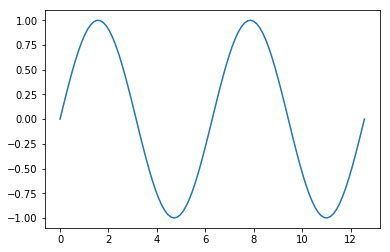

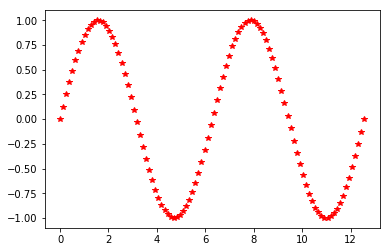

In [111]:
import matplotlib.pyplot as plt

x=np.linspace(0,4*np.pi,100)
y=np.sin(x)

plt.plot(x,y)
plt.show()
plt.plot(x,y,'r*')

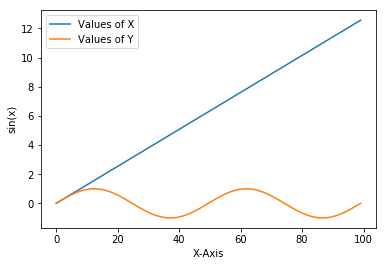

In [116]:
plt.plot(x)
plt.plot(y)
plt.xlabel('X-Axis')
plt.ylabel('sin(x)')
plt.legend(['Values of X','Values of Y'])

Matplotlib also supports subplots. The subplot commands takes three parameters, the number of rows, the number of columns and the index of the actual plot.

Text(0.5,1,'Asinine')

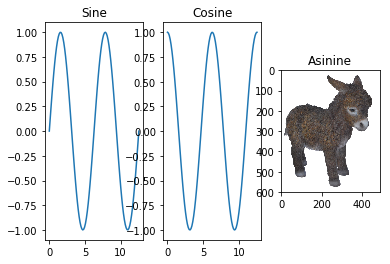

In [160]:
plt.subplot(1,3,1)
plt.plot(x,y)
plt.title('Sine')
plt.subplot(1,3,2)
plt.plot(x,np.cos(x))
plt.title('Cosine')

plt.subplot(1,3,3)
img=plt.imread("http://officialpsds.com/imageview/70/9p/709pk4_large.png?1534032868")
plt.imshow(img)
plt.title('Asinine')

Matplotlib also supports reading and showing images (imread, imshow), albeit only in PNG format. More options are provided when using the pillow library. 

## Using animations

Sometimes it is useful to animate data, for example to show how a computation progresses. Unfortunately it is not possible to do this in Jupyter. Instead, an animation can be rendered by iterating over an animate function and rendered in the browser.

In [158]:
%%capture 
# the %% magic suppresses creation of an empty figure when launching 
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-2,2))
line, = ax.plot([],[],lw=2)

def init(): # plots the background of each frame
    line.set_data([],[])
    return(line,)

def animate(i): # animation function that is called for each frame
    x=np.linspace(0,4*np.pi,100)
    y=np.sin(x-i/10)
    line.set_data(x,y)
    return (line,)

anim= animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

In [159]:
HTML(anim.to_jshtml())

## Exercise

Revisit the simple Perceptron algorithm from Lecture 1 and use the animation library to show how the decision boundary is moving during training. Also investigate what happens if the algorithm cannot find a solution. Note that initializing the weights with zero will not work when visualizing the separating hyperplane. What would be a better way to initialize weights? 